# **Problem Statement**
Identify the characteristics of the target audience for each type of treadmill offered by a sports equipments manufacturing giant, to provide a better recommendation of the treadmills to the new customers.

Note: Although 44% of the products sold are KP281, there is no significant difference in the share of revenue generated by selling these products. Therefore, recommendations are made by giving equal importance to all three products.

In [793]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [794]:
df = pd.read_csv("treadmill.csv")

In [795]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [796]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [797]:
df.shape

(180, 9)

* There are 180 rows and 9 columns in the dataset. Each row represents a purchase and columns represent the product(treadmill) type and the customer attributes.

In [798]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* Categorical variables of type object - Product, Gender, MaritalStatus<br>
* Numerical variables of type int - Age, Usage, Fitness, Income, Miles

* No null value in the dataset

In [799]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

## Univariate Analysis

### Analysing the structure of data

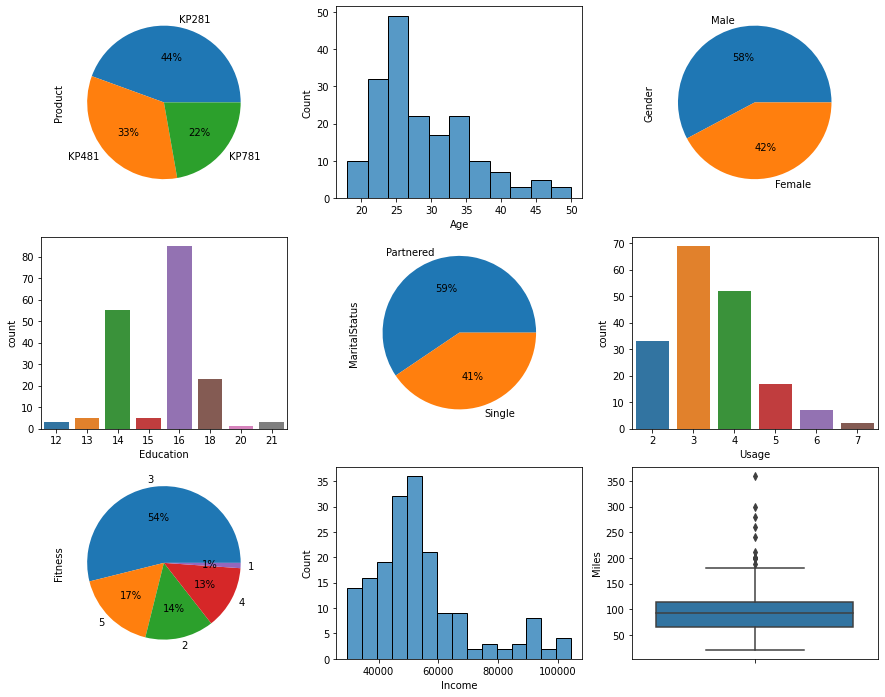

In [800]:
plt.figure(figsize=(15, 12)) 

## Product
plt.subplot(331)
df['Product'].value_counts().plot(kind='pie', autopct='%.f%%')

## Age
plt.subplot(332)
sns.histplot(data=df, x='Age')

## Gender
plt.subplot(333)
df['Gender'].value_counts().plot(kind='pie', autopct='%.f%%')

## Education
plt.subplot(334)
sns.countplot(data=df, x=df['Education'])

## MaritalStatus
plt.subplot(335)
df['MaritalStatus'].value_counts().plot(kind='pie', autopct='%.f%%')

## Usage
plt.subplot(336)
sns.countplot(data=df, x='Usage')

## Fitness
plt.subplot(337)
df['Fitness'].value_counts().plot(kind='pie', autopct='%.f%%')

## Income
plt.subplot(338)
sns.histplot(data=df, x='Income')

## Miles
plt.subplot(339)
sns.boxplot(data=df, y='Miles')

plt.show()

* Most of the treadmills sold are the entry-level type (KP281) and advanced-type (KP781) are the least sold
* Majority of the customers are male (58%)
* 3 out of 5 customers are partnered and 2/5 are single
* 54% of the customers rate themselves 3 on a scale of 1 to 5 in fitness level, 5 being excellent and only 1% rate themselves 1

In [801]:
print('Percentage of customers who have had an eduction of 16 years -',
      ((df['Education'] == 16).sum()/1.8).round(0))
print('14 years -', ((df['Education'] == 14).sum()/1.8).round(0))

Percentage of customers who have had an eduction of 16 years - 47.0
14 years - 31.0


* Close to 50% of the customers have an education of 16 years and 78% of the customers have an education of either 14 or 16 years

### Analysing the characteristics of numerical attributes

In [802]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


* Median age of a customer is 26 and 50% of the customers are in age range 24-33.
* More than 50% of the people who have purchased the treadmill have a plan to use it 3-4 days a week
* 75% of the customers fall in an annual income between $30,000-60,000
* More than half of the total customers expect to run on an average 65-115 miles a week whereas the max distance a customer expects to run is 360 miles a week. These higher values of outliers are evident from the higher value of mean(103 miles) whereas median is at 94 miles.

### Product

In [803]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [804]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

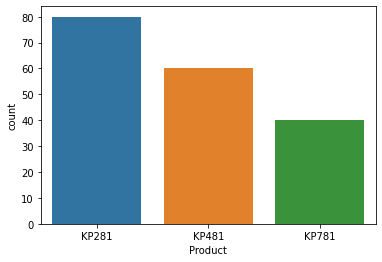

In [805]:
sns.countplot(data=df, x='Product')
plt.show()

#### Marginal Probability of products to be purchased

In [806]:
(df['Product'].value_counts(normalize=True).round(2)).to_frame().rename(columns={'Product':'Probability'})

,Probability
KP281,0.44
KP481,0.33
KP781,0.22


#### Revenue generation

In [807]:
rev = df['Product'].value_counts().to_frame().rename(columns={'Product':'Revenue%'})
rev.loc['KP281'] = rev.loc['KP281']*1500
rev.loc['KP481'] = rev.loc['KP481']*1750
rev.loc['KP781'] = rev.loc['KP781']*2500
((rev/rev.sum())*100).round(0)

,Revenue%
KP281,37.0
KP481,32.0
KP781,31.0


* Although the sales of product KP281 is higher, there is no significant difference in the share of total revenue generated by each product.

## Bivariate/Multivariate Analysis

In [808]:
df.groupby(by='Product').median()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
KP281,26.0,16.0,3.0,3.0,46617.0,85.0
KP481,26.0,16.0,3.0,3.0,49459.5,85.0
KP781,27.0,18.0,5.0,5.0,76568.5,160.0


In [809]:
df.groupby(by='Product').mean()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
KP281,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
KP481,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
KP781,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


##### Average value of attributes of the customers who have purchased products KP281 and KP481 are almost the same
##### For product KP781, values are significantly higher, notably for fields like Fitness, Income and Miles run

In [810]:
df.groupby(by=['Product', 'Gender']).mean()

Age  Education     Usage   Fitness        Income  \
Product Gender                                                           
KP281   Female  28.450000  15.100000  2.900000  2.875000  46020.075000   
        Male    28.650000  14.975000  3.275000  3.050000  46815.975000   
KP481   Female  29.103448  15.206897  3.137931  2.862069  49336.448276   
        Male    28.709677  15.032258  3.000000  2.935484  48634.258065   
KP781   Female  27.000000  17.857143  5.000000  4.571429  73633.857143   
        Male    29.545455  17.212121  4.727273  4.636364  75825.030303   

                     Miles  
Product Gender              
KP281   Female   76.200000  
        Male     89.375000  
KP481   Female   87.344828  
        Male     88.483871  
KP781   Female  180.000000  
        Male    164.121212

In [811]:
df.groupby(by=['Product', 'MaritalStatus']).mean()

Age  Education     Usage   Fitness        Income  \
Product MaritalStatus                                                           
KP281   Partnered      29.666667  15.125000  3.041667  2.854167  47848.750000   
        Single         26.875000  14.906250  3.156250  3.125000  44271.937500   
KP481   Partnered      30.222222  15.250000  3.055556  2.916667  49522.666667   
        Single         26.916667  14.916667  3.083333  2.875000  48150.125000   
KP781   Partnered      29.826087  17.434783  4.913043  4.695652  82047.173913   
        Single         28.117647  17.176471  4.588235  4.529412  66504.588235   

                            Miles  
Product MaritalStatus              
KP281   Partnered       77.229167  
        Single          91.125000  
KP481   Partnered       90.055556  
        Single          84.750000  
KP781   Partnered      183.043478  
        Single         145.058824

### Age vs Gender of customer

In [812]:
df.groupby(by=['Gender', 'Product']).describe()['Age']

count       mean       std   min    25%   50%    75%   max
Gender Product                                                            
Female KP281     40.0  28.450000  7.110664  19.0  23.75  26.5  32.25  50.0
       KP481     29.0  29.103448  5.802369  20.0  25.00  29.0  33.00  40.0
       KP781      7.0  27.000000  3.559026  23.0  24.50  26.0  29.00  33.0
Male   KP281     40.0  28.650000  7.419828  18.0  23.00  26.0  34.25  47.0
       KP481     31.0  28.709677  7.439505  19.0  23.00  25.0  33.50  48.0
       KP781     33.0  29.545455  7.462786  22.0  25.00  27.0  31.00  48.0

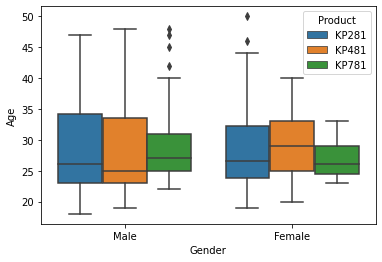

In [813]:
sns.boxplot(data=df, y='Age', x='Gender', hue='Product')
plt.show()

* Median age of customers who purchased different products are almost equal however, majority of KP781 customers fall into relatively narrow age range whereas the age is widely distributed for the customers of other two products

### Product vs Gender

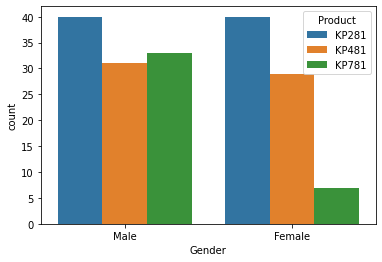

In [814]:
sns.countplot(data=df, x='Gender', hue='Product')
plt.show()

#### Marginal Probability table

In [815]:
pd.crosstab(df['Product'], df['Gender'], normalize=True, margins=True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


#### Conditional Probability table

In [816]:
pd.crosstab(df['Product'], df['Gender'], normalize='index', margins=True).round(2)

Gender,Female,Male
Product,,
KP281,0.50,0.50
KP481,0.48,0.52
KP781,0.18,0.82
All,0.42,0.58


* P(Product=KP781 and Gender=Male) = 0.18
* P(Male/KP781) = 0.82

##### The likelihood of a male customer buying KP781 is 18% but if the product sold is KP781, there is 82% probability that it is bought by a male

### Product vs Education

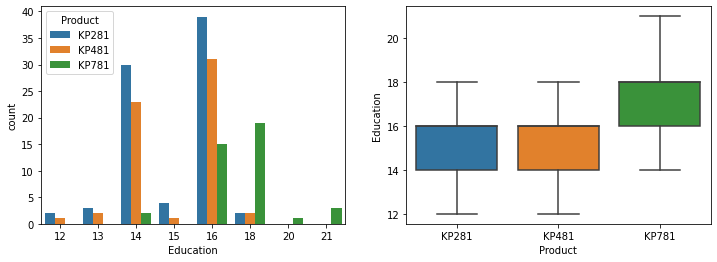

In [817]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
sns.countplot(data=df, x='Education', hue='Product')

plt.subplot(122)
sns.boxplot(data=df, y='Education', x='Product')

plt.show()

In [818]:
pd.crosstab(df['Product'], df['Education'], margins=True, normalize=True).round(2)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,0.01,0.02,0.17,0.02,0.22,0.01,0.00,0.00,0.44
KP481,0.01,0.01,0.13,0.01,0.17,0.01,0.00,0.00,0.33
KP781,0.00,0.00,0.01,0.00,0.08,0.11,0.01,0.02,0.22
All,0.02,0.03,0.31,0.03,0.47,0.13,0.01,0.02,1.00


* Around half of the customers have received 16 years of education which is the median years of education of those who purchased KP281 and KP481
* Incase of KP781, the medain years of eduation is 18 and the only product sold to customers with more than 18 years of education is KP781
* P(Product=KP781 and Education > 16) = 0.11 + 0.01 + 0.02 = 0.14
* P(Product=KP781/Education > 16) = 0.14/(0.13+0.01+0.02) = 0.14/0.16 = 0.875

##### There is an 87.5% chance that the product sold is KP781 given the customer has an eduction greater than or equal to 18 years

### Product vs MaritalStatus

In [819]:
pd.crosstab(df['Product'], df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


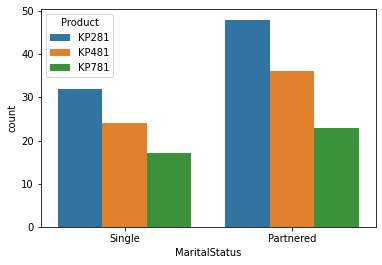

In [820]:
sns.countplot(data=df, x='MaritalStatus', hue='Product')
plt.show()

### Prduct vs Usage

#### Marginal Probability

In [821]:
pd.crosstab(df['Product'], df['Usage'], margins=True, normalize=True).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


#### Conditional Probability

In [822]:
pd.crosstab(df['Product'], df['Usage'], margins=True, normalize='index').round(2)

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.24,0.46,0.28,0.02,0.00,0.00
KP481,0.23,0.52,0.20,0.05,0.00,0.00
KP781,0.00,0.02,0.45,0.30,0.18,0.05
All,0.18,0.38,0.29,0.09,0.04,0.01


* P(KP781 and Usage >= 4) = 0.45+0.30+0.18+0.05 = 0.98

##### 98% of KP781 customers use a treadmill 4+ days a week

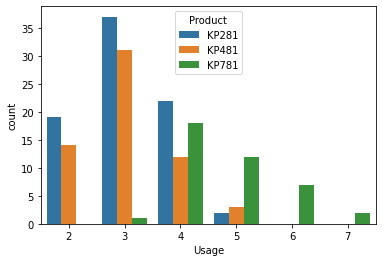

In [823]:
sns.countplot(data=df, x='Usage', hue='Product')
plt.show()

* The only product purchased by customers those who run more than 5 days a week is KP781

### Product vs Fitness

##### Marginal Probability

In [824]:
pd.crosstab(df['Product'], df['Fitness'], normalize=True, margins=True).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


##### Conditional Probability

In [825]:
pd.crosstab(df['Product'], df['Fitness'], normalize='index', margins=True).round(2)

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.01,0.18,0.68,0.11,0.02
KP481,0.02,0.20,0.65,0.13,0.00
KP781,0.00,0.00,0.10,0.18,0.72
All,0.01,0.14,0.54,0.13,0.17


In [826]:
df.groupby(by=['Gender', 'Product']).describe()['Fitness']

count      mean       std  min   25%  50%  75%  max
Gender Product                                                     
Female KP281     40.0  2.875000  0.647975  2.0  2.75  3.0  3.0  5.0
       KP481     29.0  2.862069  0.693034  1.0  3.00  3.0  3.0  4.0
       KP781      7.0  4.571429  0.786796  3.0  4.50  5.0  5.0  5.0
Male   KP281     40.0  3.050000  0.677476  1.0  3.00  3.0  3.0  5.0
       KP481     31.0  2.935484  0.573613  2.0  3.00  3.0  3.0  4.0
       KP781     33.0  4.636364  0.652791  3.0  4.00  5.0  5.0  5.0

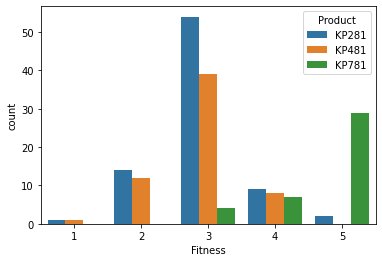

In [827]:
sns.countplot(data=df, x='Fitness', hue='Product')
plt.savefig('fitness_kp')
plt.show()

### Product vs Miles

In [828]:
df.groupby(by=['Gender', 'Product']).describe()['Miles']

count        mean        std    min    25%    50%     75%  \
Gender Product                                                              
Female KP281     40.0   76.200000  27.988276   38.0   56.0   75.0   87.25   
       KP481     29.0   87.344828  33.456022   21.0   74.0   85.0   95.00   
       KP781      7.0  180.000000  63.245553  100.0  140.0  200.0  200.00   
Male   KP281     40.0   89.375000  28.573511   47.0   75.0   85.0  105.25   
       KP481     31.0   88.483871  33.625259   42.0   58.5   95.0  106.00   
       KP781     33.0  164.121212  60.014455   80.0  120.0  160.0  180.00   

                  max  
Gender Product         
Female KP281    188.0  
       KP481    212.0  
       KP781    280.0  
Male   KP281    169.0  
       KP481    170.0  
       KP781    360.0

##### Outliers

There are outliers in both the sides of KP481 for a female customer<br>
* IQR = 95-74 = 21
* Q1-1.5IQR = 74-31.5 = 42.5 wheras Q0 = 21
* Q3+1.5IQR = 95+31.5 = 126.5 wheras Q4 = 212 which is 68% more.

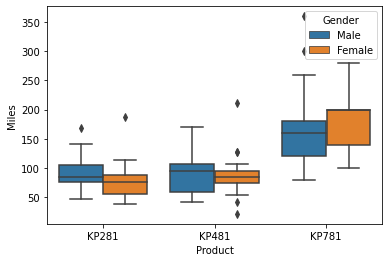

In [829]:
sns.boxplot(data=df, y='Miles', x='Product', hue='Gender')
plt.show()

### Product-Income

In [830]:
df.groupby(by='Product').describe()['Income']

,count,mean,std,min,25%,50%,75%,max
Product,,,,,,,,
KP281,80.0,46418.025,9075.783190,29562.0,38658.00,46617.0,53439.0,68220.0
KP481,60.0,48973.650,8653.989388,31836.0,44911.50,49459.5,53439.0,67083.0
KP781,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.0,104581.0


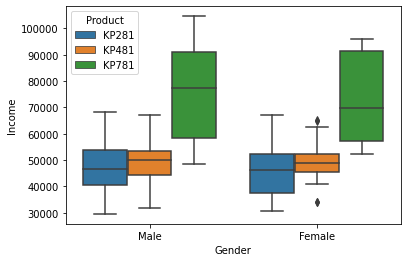

In [831]:
sns.boxplot(data=df, y='Income', x='Gender', hue='Product')
plt.savefig('income_product')
plt.show()

### Product-Income-MaritalStatus

In [832]:
df.groupby(by=['Product', 'MaritalStatus']).describe()['Income']

count          mean           std      min      25%  \
Product MaritalStatus                                                        
KP281   Partnered       48.0  47848.750000   8806.643596  30699.0  40932.0   
        Single          32.0  44271.937500   9186.952283  29562.0  36384.0   
KP481   Partnered       36.0  49522.666667   8635.403820  32973.0  45480.0   
        Single          24.0  48150.125000   8800.977467  31836.0  43206.0   
KP781   Partnered       23.0  82047.173913  16387.308472  49801.0  67853.5   
        Single          17.0  66504.588235  17830.525750  48556.0  52290.0   

                           50%       75%       max  
Product MaritalStatus                               
KP281   Partnered      46617.0  53723.25   68220.0  
        Single         43774.5  52302.00   67083.0  
KP481   Partnered      51165.0  53439.00   64809.0  
        Single         47185.5  50312.25   67083.0  
KP781   Partnered      85906.0  93819.50  104581.0  
        Single         58516.0  88396.00   92131.0

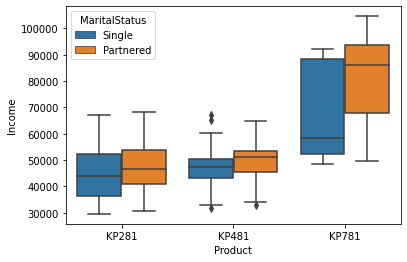

In [833]:
sns.boxplot(data=df, y='Income', x='Product', hue='MaritalStatus')
plt.savefig('marital_income')
plt.show()

### Product-Miles-Gender

In [834]:
df.groupby(by=['Gender', 'Product']).describe()['Miles']

count        mean        std    min    25%    50%     75%  \
Gender Product                                                              
Female KP281     40.0   76.200000  27.988276   38.0   56.0   75.0   87.25   
       KP481     29.0   87.344828  33.456022   21.0   74.0   85.0   95.00   
       KP781      7.0  180.000000  63.245553  100.0  140.0  200.0  200.00   
Male   KP281     40.0   89.375000  28.573511   47.0   75.0   85.0  105.25   
       KP481     31.0   88.483871  33.625259   42.0   58.5   95.0  106.00   
       KP781     33.0  164.121212  60.014455   80.0  120.0  160.0  180.00   

                  max  
Gender Product         
Female KP281    188.0  
       KP481    212.0  
       KP781    280.0  
Male   KP281    169.0  
       KP481    170.0  
       KP781    360.0

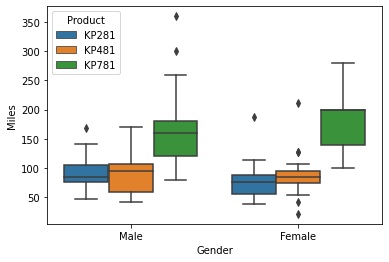

In [835]:
sns.boxplot(data=df, y='Miles', x='Gender', hue='Product')
plt.show()

### Correlation

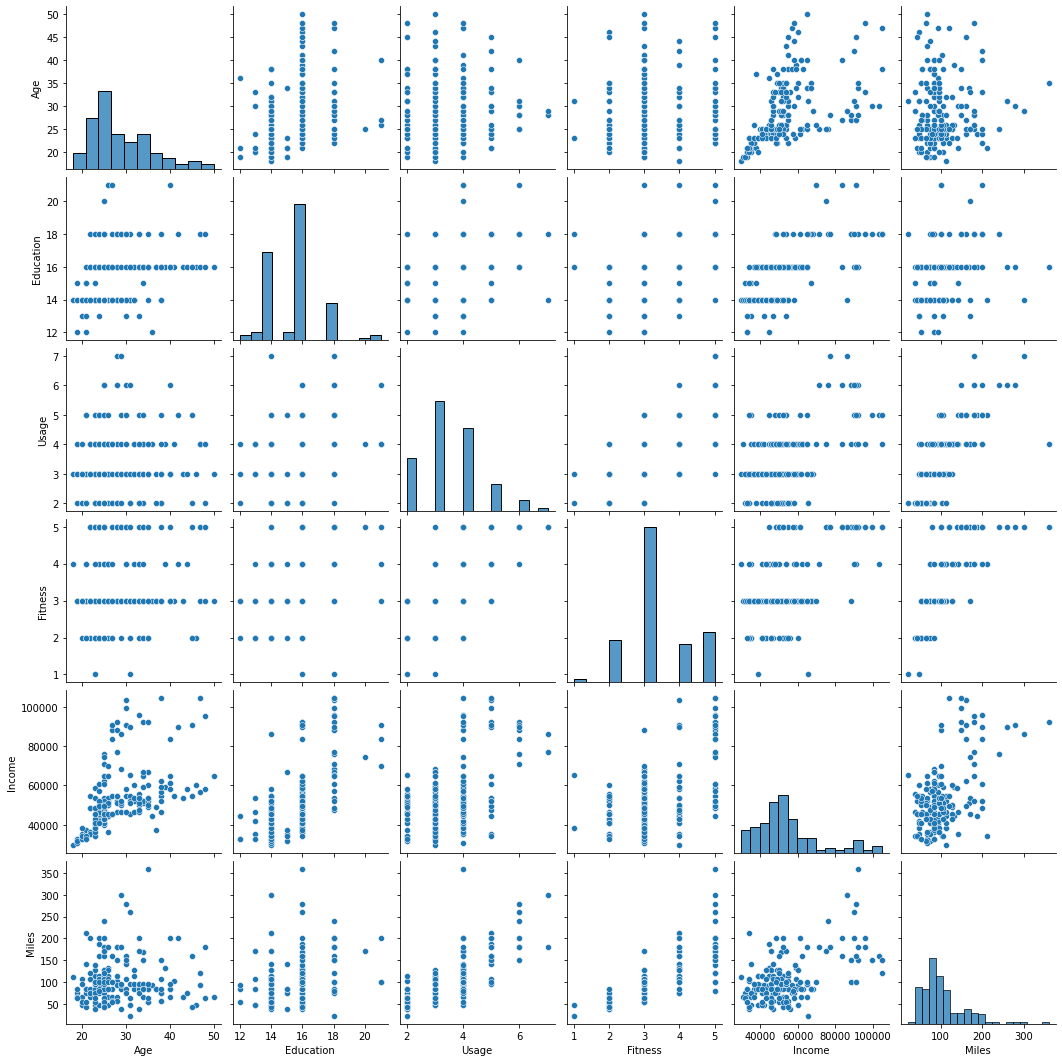

In [836]:
sns.pairplot(data=df)
plt.show()

In [837]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


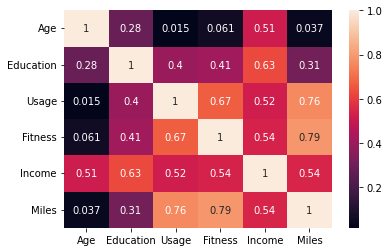

In [838]:
sns.heatmap(df.corr(), annot=True)
plt.show()

##### There is a strong correlation between Miles-Fitness and Miles-Usage
##### Income has a moderate correlation greater than 0.5 with Age, Usage, Fitness, Education and Miles

### Product - Miles - Age

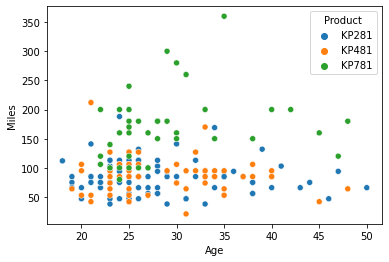

In [839]:
sns.scatterplot(data=df, x='Age', y='Miles', hue='Product')
plt.show()

### Product - Income - Miles

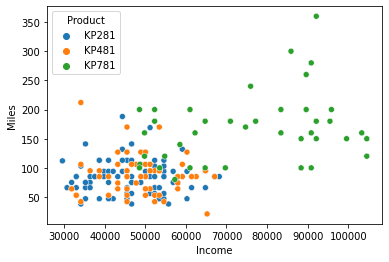

In [840]:
sns.scatterplot(data=df, x='Income', y='Miles', hue='Product')
plt.savefig('income_miles')
plt.show()

##### No significant relationship can be observed between income and miles run for the customers of product KP281 and KP481. However, KP781 customers tend to run more and have a relatively high annual income

# **Analysis Insights**

I. KP781
     1. The likelihood of a male customer buying KP781 is 18% but, if the product sold is KP781, there is 82% probability that it is bought by a male. This implies that 4 out of 5 cutomers of product KP781 are male.
     2. Overall, only 16% of the customers have had an education of more than 16 years however, there is an 88% chance that the product sold is KP781 given the customer has an eduction greater than 16 years. Also, an average annual income over $75,000 which 50% more than that of the other cutomers.
     3. Median Usage is 5 days and a running distance between 120-200 miles a week. Also, a median customer rate themselves 5/5 in fitness.

II. KP281 and KP481
     1. 68% of KP281 customers and 65% of KP481 customers have rated themselves 3 on a fitness scale 1-5. And no significant difference can be seen between male and female customer fitness levels.
     2. Median income of customers of both the product is found to be almost same($47k-49k) however, majority of product KP481 customers fall into a relaively narrow income range and partnered people found to have slightly higher income.
     3. No significant difference can be observed in the distance run when income rises for either of the products.

# **Recommendations and Customer Profiling**
1. Target Audience (KP281) - Moderately fit people of any gender with annual income between $35,000-55,000 and usage between 2-4 days a week.
2. Target Audience (KP481)- Moderately fit people of any gender with annual income between $45,000-55,000 and usage between 2-4 days a week.
3. Target audience(KP781) - Highly educated (16+ years) rich ($60k+) male customers who are already fit and expect to use a treadmill disproportionately high.
4. Since there is no significant difference between the customers of KP281 and KP481, the treadmill KP481 can be targeted to KP281 customers with an annual income greater than $45,000 for better revenue growth.